### $\text{Analysis on Boston dataset:}$
- Find the minimum number of features required to get the best possible 
predictions.
- Exploratory data analysis.
1. Univariate Linear Regression
2. Multivariate Linear Regression
3. Polynomial Regression
4. Univariate Linear Regression with Scaling
5. Multivariate Linear Regression with Scaling
6. Polynomial Regression with Scaling


In [62]:
import numpy as np   # importing numpy with the name 'np'
import pandas as pd  # importing pandas with the name 'pd'

### Introduction:

Boston dataset is a dataset of house price depending upon the features. The features are given in the columns. Here it will be shown that how these features effect the price. Different algorithms will be used to predict the price.

Just importing it. 

In [63]:
dt = pd.read_csv('Boston.train.csv')  # importing the dataset

In [64]:
dt

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [65]:
(dt.corr() > 0.4).sum() # checking highly correlated features, correlation higher than 0.4.

Id                1
MSSubClass        1
LotFrontage       4
LotArea           2
OverallQual      13
OverallCond       1
YearBuilt         8
YearRemodAdd      7
MasVnrArea        3
BsmtFinSF1        4
BsmtFinSF2        1
BsmtUnfSF         2
TotalBsmtSF       9
1stFlrSF         11
2ndFlrSF          6
LowQualFinSF      1
GrLivArea        14
BsmtFullBath      2
BsmtHalfBath      1
FullBath         11
HalfBath          3
BedroomAbvGr      4
KitchenAbvGr      1
TotRmsAbvGrd      8
Fireplaces        4
GarageYrBlt       8
GarageCars       11
GarageArea       10
WoodDeckSF        1
OpenPorchSF       1
EnclosedPorch     1
3SsnPorch         1
ScreenPorch       1
PoolArea          1
MiscVal           1
MoSold            1
YrSold            1
SalePrice        14
dtype: int64

### $\text{Different Machine Learning Algorithms}$

1. Univariate Linear Regression
2. Multivariate Linear Regression
3. Polynomial Regression
4. Univariate Linear Regression with Scaling
5. Multivariate Linear Regression with Scaling
6. Polynomial Regression with Scaling

#### $\text{Using all of them one by one for training and prediction of the dataset}$

### 1) Univariate Linear Regression
Univariate build relation between two features only. **Linear Regression** uses the relationship between the data-points to draw a straight line through all them.

So, taking one highly correlated feature.

In [66]:
# First, setting the output or features to be predicted.
y = np.array(dt['SalePrice'])

In [67]:
x = np.array(dt['GrLivArea']) # highly correlated feature for univariate Linear Regression.

In [68]:
x.shape

(1460,)

In [69]:
import matplotlib.pyplot as plt # importing ploting library for ploting the relation of features

In [70]:
from sklearn import linear_model # importing the model.

unimodel = linear_model.LinearRegression()
# reshaping the features,
x = x.reshape((len(x), 1)) 
y = y.reshape((len(y), 1))  

In [71]:
type(x)

numpy.ndarray

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.1, random_state=100)

In [73]:
unimodel.fit(x_train, y_train)

LinearRegression()

In [74]:
ypred = unimodel.predict(x_test)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
ypred.shape

(146, 1)

In [77]:
y_test.shape

(146, 1)

In [78]:
#acc(ypred,y_test)

**Linear Regression** draws a straight line.
Equation of straight line is:
**$\text{y = mx +c}$**

where:
- **y** is the output,
- **x** is the input feature,
- **m** is the slope or coeffecient and,
- **c** is the intercept.

Which can be found by

In [79]:
unimodel.coef_  # It is the value of "m"

array([[107.12447993]])

In [80]:
unimodel.intercept_ # It is the value of "c"

array([18576.57566856])

### Ploting  graph

#### Ploting the train data

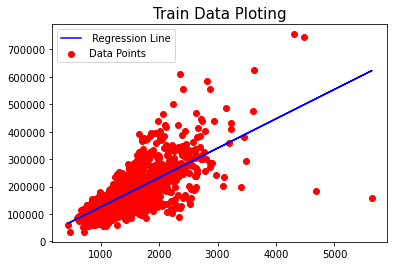

In [81]:
plt.scatter(x_train,y_train, color ='r', label = "Data Points", marker='o')
plt.plot(x_train, unimodel.predict(x_train), color = 'b', label = " Regression Line")
plt.title(f"Train Data Ploting", fontsize = 15, color = 'k')
plt.legend()

#### ploting the test data

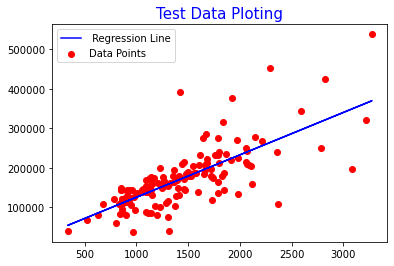

In [82]:
plt.scatter(x_test,y_test, color='r', label = "Data Points", marker='o')
plt.plot(x_test, unimodel.predict(x_test), color= 'b', label = " Regression Line")
plt.title(f"Test Data Ploting", fontsize = 15, color = 'b')
plt.legend()

In [83]:
from sklearn.metrics import accuracy_score, r2_score
accuracy1 = r2_score(x_test, y_test)
accuracy1

-127744.4631170113

**The accuracy of this moddel is very poor**

### 2)  Multivariate

**For multivariate logistic regression, just selecting multiple features from the dataset.**

In [84]:
from sklearn import linear_model
modelmulti = linear_model.LinearRegression()

x = (dt[['GrLivArea','OverallQual','1stFlrSF','GarageCars','GarageArea']])
y = ((dt[['SalePrice']]))


In [85]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 20)

In [86]:
modelmulti.fit(x_train, y_train)

LinearRegression()

In [87]:
result= modelmulti.predict(x_test)


In [88]:
from sklearn.metrics import accuracy_score, r2_score


In [89]:
accuracy2 = r2_score(y_test, result)
accuracy2


0.7802907911756298

$\text{The accuracy of the model has improved upto 78%}$

### Visualisation 

In [90]:
print(x.columns)
print(y.columns)

Index(['GrLivArea', 'OverallQual', '1stFlrSF', 'GarageCars', 'GarageArea'], dtype='object')
Index(['SalePrice'], dtype='object')


#### Training plot

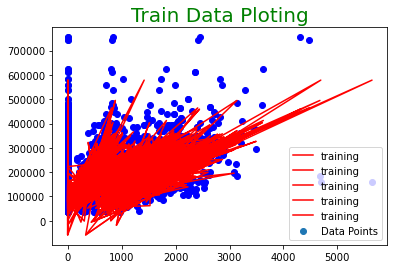

In [91]:
plt.scatter(x_train['OverallQual'], y_train, label = 'Data Points')
plt.scatter(x_train['1stFlrSF'], y_train, color = 'b', marker = 'o')
plt.scatter(x_train['GarageCars'], y_train, color = 'b', marker = 'o')
plt.scatter(x_train['GrLivArea'], y_train, color = 'b', marker = 'o')
plt.scatter(x_train['GarageArea'], y_train, color = 'b', marker = 'o')
plt.plot(x_train, modelmulti.predict(x_train), color = 'red', label = "training")
plt.title("Train Data Ploting", fontsize = 20, color = 'g')
plt.legend()


### Testing plot

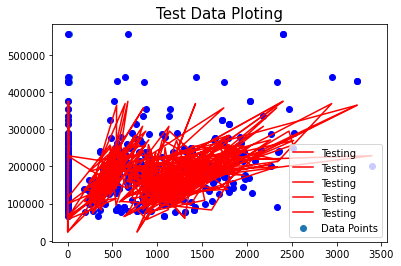

In [93]:
plt.scatter(x_test['OverallQual'], y_test, label = 'Data Points')
plt.scatter(x_test['1stFlrSF'], y_test, color = 'b', marker = 'o')
plt.scatter(x_test['GarageCars'], y_test, color = 'b', marker = 'o')
plt.scatter(x_test['GrLivArea'], y_test, color = 'b', marker = 'o')
plt.scatter(x_test['GarageArea'], y_test, color = 'b', marker = 'o')
plt.plot(x_test, modelmulti.predict(x_test), color = 'red', label = "Testing")
plt.title("Test Data Ploting", fontsize = 15, color = 'k')
plt.legend()



### 3) Polynomial

In [94]:
from sklearn.preprocessing import PolynomialFeatures

In [95]:
poly_features = PolynomialFeatures(degree = 2)

x_poly = poly_features.fit_transform(x_train)

In [96]:
# from sklearn.model_selection import LinearRegression
from sklearn.linear_model import LinearRegression

In [97]:
polyreg = LinearRegression()
polyreg.fit(x_poly,y_train)

LinearRegression()

In [98]:
polyreg = LinearRegression()
polyreg.fit(x_poly, y_train)

LinearRegression()

In [99]:
accuracy3 = polyreg.score(x_poly, y_train)

accuracy3

0.8380961968938514

### Traing data plot

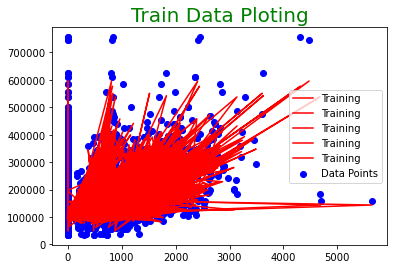

In [100]:
plt.scatter(x_train['OverallQual'], y_train, color = 'b', marker = 'o', label = 'Data Points')
plt.scatter(x_train['1stFlrSF'], y_train, color = 'b', marker = 'o')
plt.scatter(x_train['GarageCars'], y_train, color = 'b', marker = 'o')
plt.scatter(x_train['GrLivArea'], y_train, color = 'b', marker = 'o')
plt.scatter(x_train['GarageArea'], y_train, color = 'b', marker = 'o')
plt.plot(x_train, polyreg.predict(poly_features.fit_transform(x_train)), color = 'r', label = 'Training')
plt.title("Train Data Ploting", fontsize = 20, color = 'g')
plt.legend()

### Testing data plot

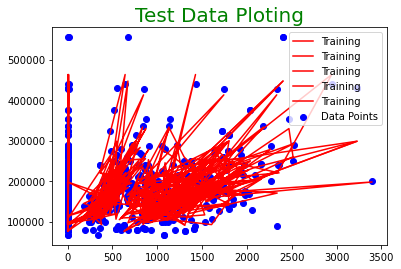

In [101]:
plt.scatter(x_test['OverallQual'], y_test, color = 'b', marker = 'o', label = 'Data Points')
plt.scatter(x_test['1stFlrSF'], y_test, color = 'b', marker = 'o')
plt.scatter(x_test['GarageCars'], y_test, color = 'b', marker = 'o')
plt.scatter(x_test['GrLivArea'], y_test, color = 'b', marker = 'o')
plt.scatter(x_test['GarageArea'], y_test, color = 'b', marker = 'o')
plt.plot(x_test, polyreg.predict(poly_features.fit_transform(x_test)), color = 'r', label = 'Training')
plt.title("Test Data Ploting", fontsize = 20, color = 'g')
plt.legend()

### 4) Univariante scaling

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
x_us = dt[['GrLivArea']]
y_us = dt[['SalePrice']]

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x_us, y_us, test_size = 0.2, random_state = 100)

### Scaling

In [105]:
standard = StandardScaler()

In [106]:
x_train = standard.fit_transform(x_train)

In [107]:
x_test = standard.fit_transform(x_test)

### Training

In [108]:
unisc = LinearRegression()
unisc.fit(x_train, y_train)

LinearRegression()

### Accuracy

In [109]:
accuracy4 = unisc.score(x_train, y_train)
accuracy4

0.47740703756923786

After scaling, the model accuracy has improved to 47%.

### $\text{Visualization}$

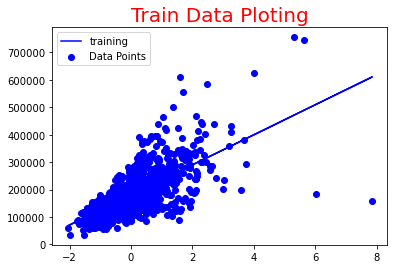

In [110]:
plt.scatter(x_train, y_train, color = 'b', marker = 'o', label = 'Data Points')
plt.plot(x_train, unisc.predict(x_train), color = 'blue', label = "training")
plt.title("Train Data Ploting", fontsize = 20, color = 'red')
plt.legend()

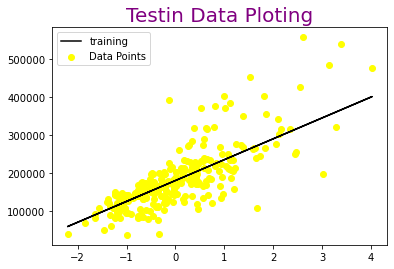

In [111]:
plt.scatter(x_test, y_test, color = 'yellow', marker = 'o', label = 'Data Points')
plt.plot(x_test, unisc.predict(x_test), color = 'black', label = "training")
plt.title("Testin Data Ploting", fontsize = 20, color = 'purple')
plt.legend()

### 5) Multivariant Scaling

In [112]:
x = dt[['OverallQual','1stFlrSF','GarageCars','GarageArea','GrLivArea']]
y = dt['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

### scaling

In [113]:
stdsc_m = StandardScaler()

In [114]:
x_train = stdsc_m.fit_transform(x_train)
x_test = stdsc_m.fit_transform(x_test)

In [115]:
multsc = LinearRegression()

In [116]:
multsc.fit(x_train, y_train)

LinearRegression()

In [117]:
accuracy5 = multsc.score(x_test, y_test)
accuracy5

0.8142385061367056

The accuracy has improved to 81.4%

**visualization**

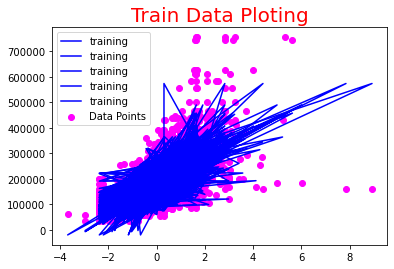

In [120]:
plt.scatter(x_train[:,0], y_train, color = 'magenta', label = 'Data Points')
plt.scatter(x_train[:,1], y_train, color = 'magenta', marker = 'o')
plt.scatter(x_train[:,2], y_train, color = 'magenta', marker = 'o')
plt.scatter(x_train[:,3], y_train, color = 'magenta', marker = 'o')
plt.scatter(x_train[:,4], y_train, color = 'magenta', marker = 'o')
plt.plot(x_train, multsc.predict(x_train), color = 'blue', label = "training")
plt.title("Train Data Ploting", fontsize = 20, color = 'red')
plt.legend()

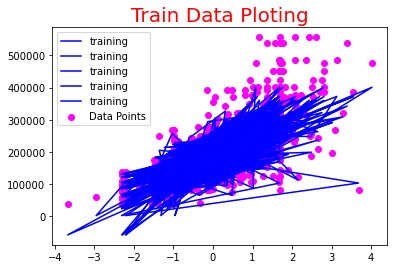

In [121]:
plt.scatter(x_test[:,0], y_test, color = 'magenta', label = 'Data Points')
plt.scatter(x_test[:,1], y_test, color = 'magenta', marker = 'o')
plt.scatter(x_test[:,2], y_test, color = 'magenta', marker = 'o')
plt.scatter(x_test[:,3], y_test, color = 'magenta', marker = 'o')
plt.scatter(x_test[:,4], y_test, color = 'magenta', marker = 'o')
plt.plot(x_test, multsc.predict(x_test), color = 'blue', label = "training")
plt.title("Train Data Ploting", fontsize = 20, color = 'red')
plt.legend()

### 6) Polynomial Scaling 

In [122]:
x = dt[['OverallQual','1stFlrSF','FullBath','GarageCars','GarageArea','GrLivArea']]
y = dt['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

### Scaling 

In [123]:
polysc = StandardScaler()

In [124]:
x_train = polysc.fit_transform(x_train)
x_test = polysc.fit_transform(x_test)

### Modeling

In [125]:
polysc = PolynomialFeatures(degree = 2)

In [126]:
x_train = polysc.fit_transform(x_train)
x_test = polysc.fit_transform(x_test)

In [127]:
polyrgrs = LinearRegression()

In [128]:
polyrgrs.fit(x_train, y_train)

LinearRegression()

### Checking Model

In [129]:
accuracy6 = polyrgrs.score(x_train,y_train)
accuracy6

0.8360558914091097

Performanc is better than the privous one.

**visualization**

### Train data ploting

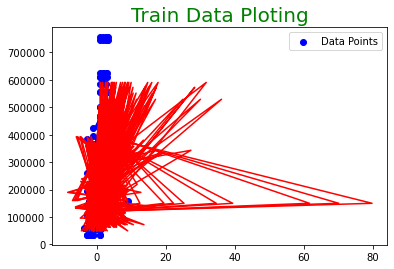

In [130]:
plt.scatter(x_train[:,0], y_train, color = 'b', marker = 'o', label = 'Data Points')
plt.scatter(x_train[:,1], y_train, color = 'b', marker = 'o')
plt.scatter(x_train[:,2], y_train, color = 'b', marker = 'o')
plt.scatter(x_train[:,3], y_train, color = 'b', marker = 'o')
plt.scatter(x_train[:,4], y_train, color = 'b', marker = 'o')
plt.plot(x_train, polyrgrs.predict(x_train), color = 'r')
plt.title("Train Data Ploting", fontsize = 20, color = 'g')
plt.legend()

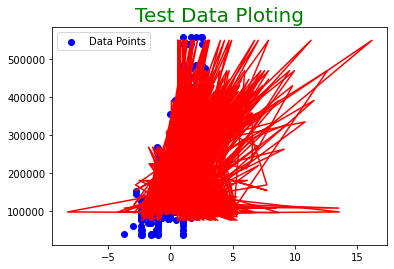

In [131]:
plt.scatter(x_test[:,0], y_test, color = 'b', marker = 'o', label = 'Data Points')
plt.scatter(x_test[:,1], y_test, color = 'b', marker = 'o')
plt.scatter(x_test[:,2], y_test, color = 'b', marker = 'o')
plt.scatter(x_test[:,3], y_test, color = 'b', marker = 'o')
plt.scatter(x_test[:,4], y_test, color = 'b', marker = 'o')
plt.plot(x_test, polyrgrs.predict(x_test), color = 'r')
plt.title("Test Data Ploting", fontsize = 20, color = 'g')
plt.legend()

## Conclusion
#### Comparing the accuracy

In [132]:
act = {"Accuracy" :[accuracy1,
                    accuracy2,
                    accuracy3,
                    accuracy4,
                    accuracy5,
                    accuracy6]}
index = ['Univariant', 
        "Multi Variant", 
        'PolyNomial',
        'Scaled univariant',
        'Scaled Multi Variant',
        'Scaled Polynomial']
acctb = pd.DataFrame(act, index = index)
acctb

,Accuracy
Univariant,-127744.463117
Multi Variant,0.780291
PolyNomial,0.838096
Scaled univariant,0.477407
Scaled Multi Variant,0.814239
Scaled Polynomial,0.836056
